<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/potato220811_ver1_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
model = load_model('/content/drive/MyDrive/deeplearning/potato/keras_model-potato-ver1.h5')

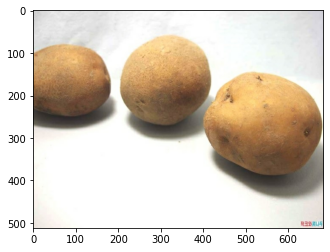

In [4]:
img = tf.io.read_file('/content/drive/MyDrive/deeplearning/potato/test/defective/f-010.jpg')
img2 = tf.io.read_file('/content/drive/MyDrive/deeplearning/potato/test/non-defective/0017.jpg')
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
tensor2 = tf.io.decode_image(img2, channels=3, dtype=tf.dtypes.float32)

plt.imshow(tensor2)

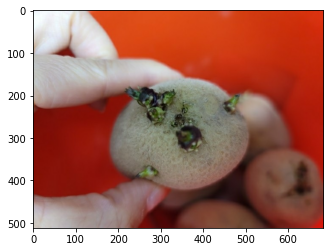

In [5]:
plt.imshow(tensor)

In [6]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('/content/drive/MyDrive/deeplearning/potato/test/non-defective/0017.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

In [7]:
#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[9.9975425e-01 2.4576797e-04]]


In [8]:
if prediction[0][0] > prediction[0][1]:
    print("non-defective")
else:
    print("defective")

non-defective


In [9]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image2 = Image.open('/content/drive/MyDrive/deeplearning/potato/test/defective/f-010.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image2 = ImageOps.fit(image2, size, Image.ANTIALIAS)

In [10]:
#turn the image into a numpy array
image_array2 = np.asarray(image2)
# Normalize the image
normalized_image_array2 = (image_array2.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array2

# run the inference
prediction2 = model.predict(data)
print(prediction2)

[[0.06250525 0.9374947 ]]


In [11]:
if prediction2[0][0] > prediction2[0][1]:
    print("non-defective")
else:
    print("defective")

defective
